In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import LabelEncoder

In [3]:
#데이터 불러오기
regular = pd.read_csv("Regular_Season_Batter.csv")
dayby = pd.read_csv("Regular_Season_Batter_Day_by_Day.csv")
preseason = pd.read_csv("Pre_Season_Batter.csv")

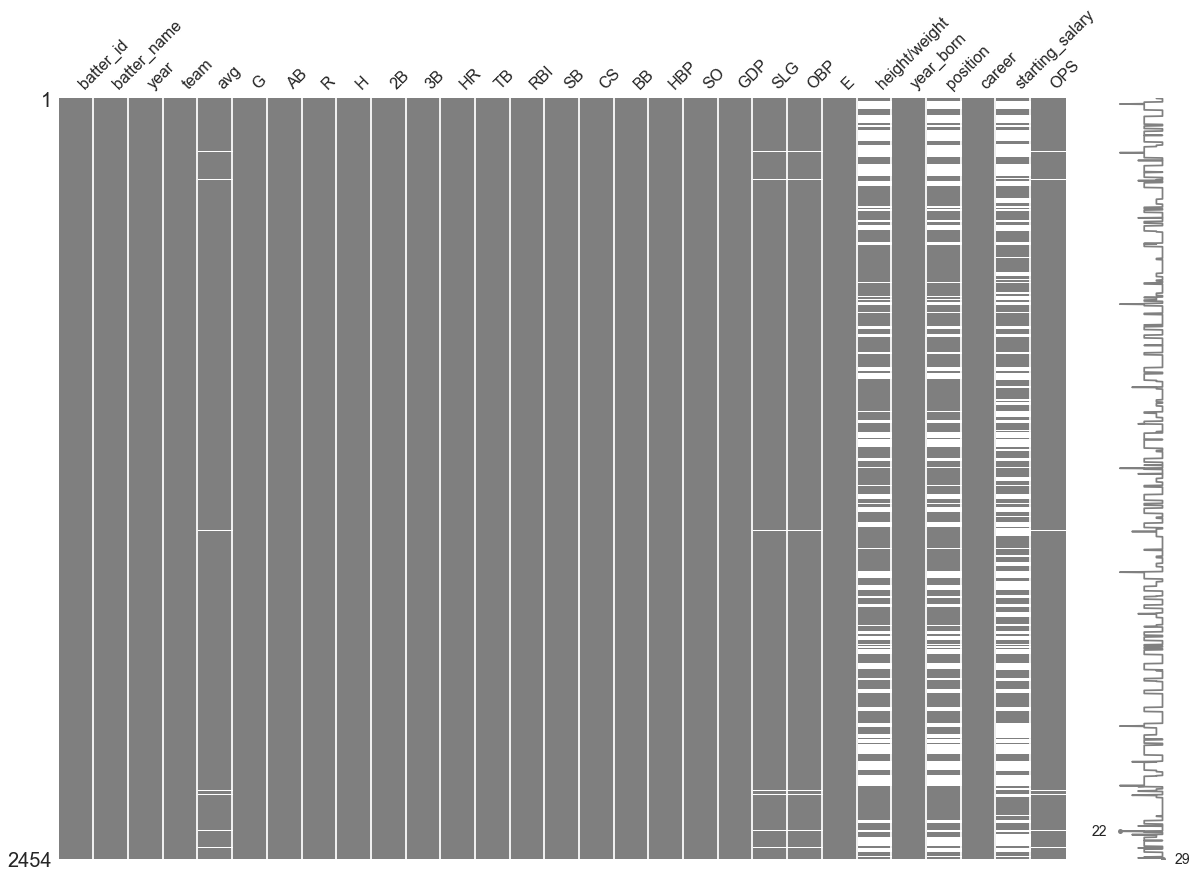

In [4]:
%matplotlib inline
msno.matrix(df=regular, figsize= (20, 14), color = (0.5, 0.5, 0.5) )

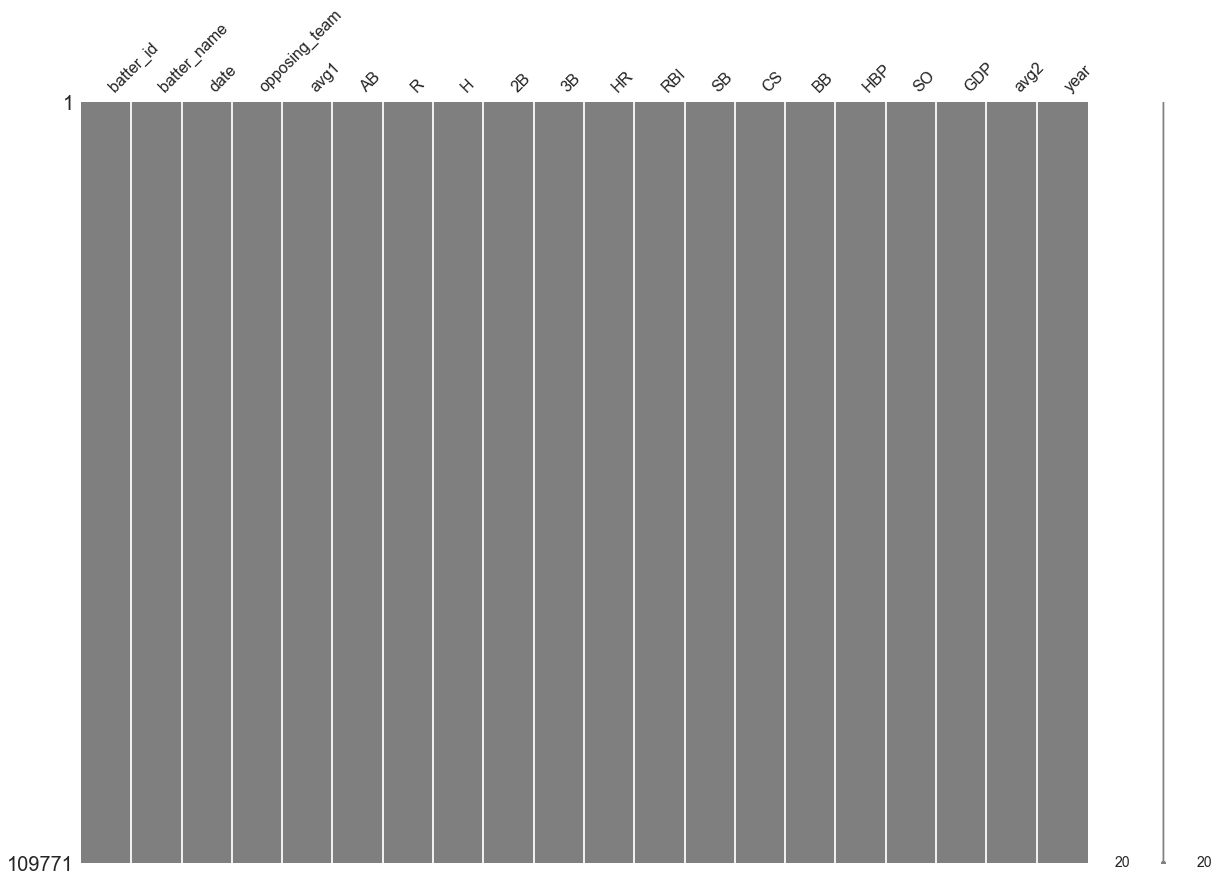

In [5]:
%matplotlib inline
msno.matrix(df=dayby, figsize= (20, 14), color = (0.5, 0.5, 0.5) )

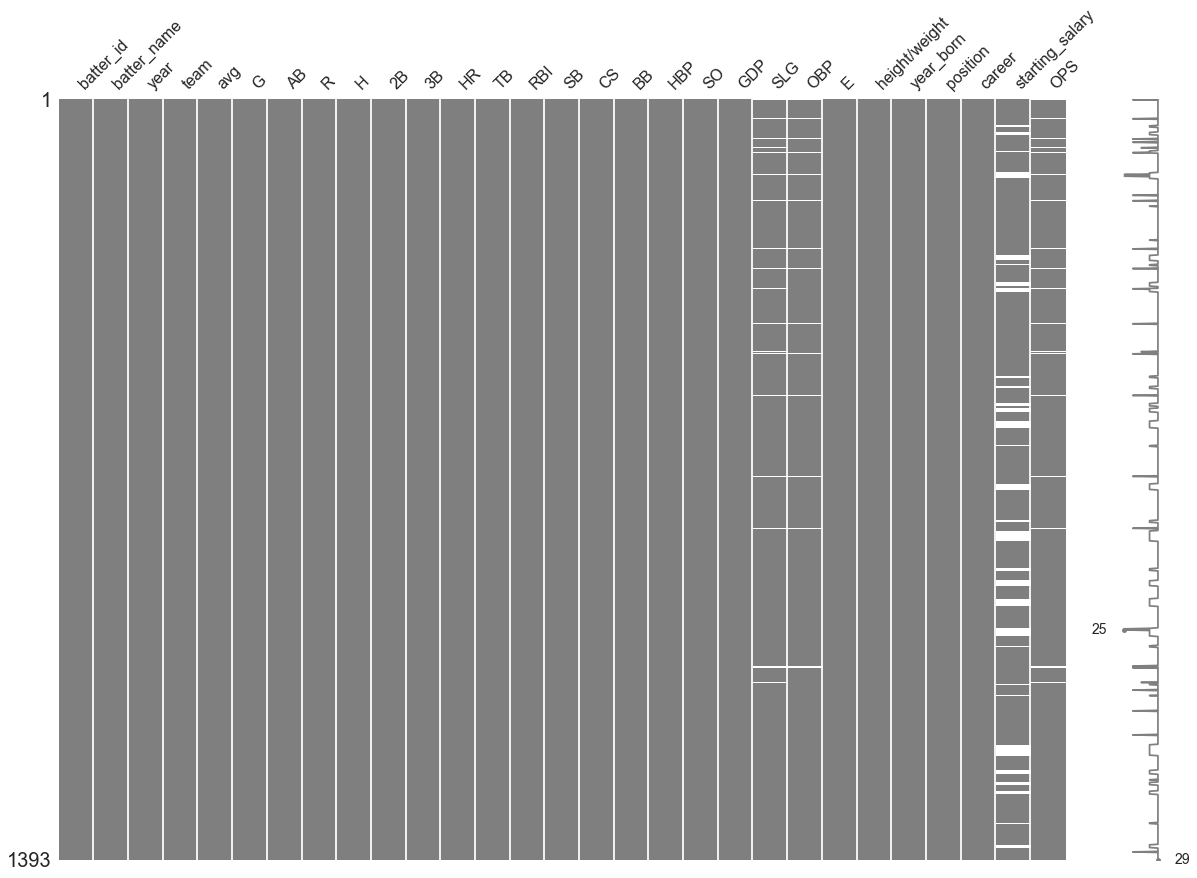

In [6]:
%matplotlib inline
msno.matrix(df=preseason, figsize= (20, 14), color = (0.5, 0.5, 0.5) )

In [7]:
# null값 처리
regular['avg']= regular['avg'].fillna(value = 0)
regular['SLG']= regular['SLG'].fillna(value = 0)
regular['OBP']= regular['OBP'].fillna(value = 0)
regular['OPS']= regular['OPS'].fillna(value = 0)
preseason['SLG']= regular['SLG'].fillna(value = 0)
preseason['OBP']= regular['OBP'].fillna(value = 0)
preseason['OPS']= regular['OPS'].fillna(value = 0)

In [9]:
#팀 라벨화
label = LabelEncoder()

label.fit(regular['team'])
regular['team'] = label.transform(regular['team'])
label.fit(preseason['team'])
preseason['team'] = label.transform(preseason['team'])

In [10]:
#올해 년도 구하기
# dt_now = datetime.datetime.now()
# dt_year = dt_now.year

#나이구하기
age = []

yb = list(regular['year_born'])
yr = list(regular['year'])

for i in range(len(yb)):
    pre = int(yb[i][0:4])
    pas = yr[i]
    ag = pas - pre
    age.append(ag)
    
regular['age'] = age

In [11]:
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,age
0,0,가르시아,2018,2,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,33
1,1,강경학,2011,12,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,19
2,1,강경학,2014,12,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,22
3,1,강경학,2015,12,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,23
4,1,강경학,2016,12,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,24
